In [17]:
import keras
import math
from scipy.signal import windows
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from importlib import reload

from helpers import generators, synthetic_spectrograms, utils

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

# Check whether tf is using the GPU
utils.check_gpu_use() 

GPU DETECTED ✓
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
np.random.seed(42)

## Load data

In [4]:
DATA_BATCH_SIZE = 16
GPU_BATCH_SIZE = 4

NUM_EPOCHS = 50
TRAIN_STEPS_PER_EPOCH = 1000
NUM_TRAIN_BATCHES = TRAIN_STEPS_PER_EPOCH * NUM_EPOCHS
TEST_STEPS = 100

In [ ]:
# Parameters
fs = 5000
duration = 3.0
windowLengthSec = 0.04
windowLengthSeg = int(windowLengthSec * fs)
windowLengthSegRounded = 2 ** math.ceil(math.log2(windowLengthSeg))
window = windows.hann(windowLengthSegRounded)
noverlap = int(0.75 * windowLengthSegRounded)
nfft = 1024

train_gen = generators.SyntheticSpectrogramGenerator(
    DATA_BATCH_SIZE, NUM_TRAIN_BATCHES, 
    fs, duration, window, noverlap, nfft
)
val_gen = generators.SyntheticSpectrogramGenerator(
    DATA_BATCH_SIZE, TEST_STEPS, 
    fs, duration, window, noverlap, nfft
)

## Initialise model

In [6]:
# Load the pre-trained model
model = keras.saving.load_model(
    'models/saved/n2n_imagenet10k_05122024/unet/50epochs.keras',
    custom_objects={"psnr": utils.psnr},
    compile=False
)

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5, beta_1=0.9, beta_2=0.99, epsilon=1e-8),
    loss=keras.losses.MeanSquaredError(),
    metrics=[utils.psnr]
)

## Train model

In [10]:
model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath="models/saved/synthetic_denoiser_07122024/{epoch:02d}.tf",
    monitor="val_psnr",
    save_best_only=True,
    mode='max'
)    

csv_logger = keras.callbacks.CSVLogger(
    filename="models/saved/synthetic_denoiser_07122024/training.log",
    separator=",",
    append=True
)

backup_callback = keras.callbacks.BackupAndRestore(
    backup_dir="models/saved/synthetic_denoiser_07122024/tmp"
)

In [11]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=NUM_EPOCHS,
    batch_size=GPU_BATCH_SIZE,
    steps_per_epoch=TRAIN_STEPS_PER_EPOCH,
    callbacks=[model_checkpoint, csv_logger, backup_callback]
)

Epoch 39/50
1000/1000 [==============================] - ETA: 0s - loss: 9.0681e-04 - psnr: 30.8772INFO:tensorflow:Assets written to: models/saved/synthetic_denoiser_07122024/39.tf/assets


INFO:tensorflow:Assets written to: models/saved/synthetic_denoiser_07122024/39.tf/assets


1000/1000 [==============================] - 1193s 1s/step - loss: 9.0681e-04 - psnr: 30.8772 - val_loss: 8.7609e-04 - val_psnr: 31.0322
Epoch 40/50
1000/1000 [==============================] - 1184s 1s/step - loss: 9.0057e-04 - psnr: 30.9678 - val_loss: 8.8509e-04 - val_psnr: 30.9333
Epoch 41/50
1000/1000 [==============================] - ETA: 0s - loss: 8.7169e-04 - psnr: 31.0782INFO:tensorflow:Assets written to: models/saved/synthetic_denoiser_07122024/41.tf/assets


INFO:tensorflow:Assets written to: models/saved/synthetic_denoiser_07122024/41.tf/assets


1000/1000 [==============================] - 1186s 1s/step - loss: 8.7169e-04 - psnr: 31.0782 - val_loss: 8.2981e-04 - val_psnr: 31.1877
Epoch 42/50
1000/1000 [==============================] - ETA: 0s - loss: 8.6506e-04 - psnr: 31.1404INFO:tensorflow:Assets written to: models/saved/synthetic_denoiser_07122024/42.tf/assets


INFO:tensorflow:Assets written to: models/saved/synthetic_denoiser_07122024/42.tf/assets


1000/1000 [==============================] - 1190s 1s/step - loss: 8.6506e-04 - psnr: 31.1404 - val_loss: 8.5819e-04 - val_psnr: 31.3176
Epoch 43/50
1000/1000 [==============================] - ETA: 0s - loss: 8.3700e-04 - psnr: 31.2574INFO:tensorflow:Assets written to: models/saved/synthetic_denoiser_07122024/43.tf/assets


INFO:tensorflow:Assets written to: models/saved/synthetic_denoiser_07122024/43.tf/assets


1000/1000 [==============================] - 1188s 1s/step - loss: 8.3700e-04 - psnr: 31.2574 - val_loss: 8.3170e-04 - val_psnr: 31.3305
Epoch 44/50
1000/1000 [==============================] - ETA: 0s - loss: 8.3068e-04 - psnr: 31.3470INFO:tensorflow:Assets written to: models/saved/synthetic_denoiser_07122024/44.tf/assets


INFO:tensorflow:Assets written to: models/saved/synthetic_denoiser_07122024/44.tf/assets


1000/1000 [==============================] - 1191s 1s/step - loss: 8.3068e-04 - psnr: 31.3470 - val_loss: 8.1153e-04 - val_psnr: 31.4908
Epoch 45/50
1000/1000 [==============================] - ETA: 0s - loss: 8.1258e-04 - psnr: 31.4107INFO:tensorflow:Assets written to: models/saved/synthetic_denoiser_07122024/45.tf/assets


INFO:tensorflow:Assets written to: models/saved/synthetic_denoiser_07122024/45.tf/assets


1000/1000 [==============================] - 1189s 1s/step - loss: 8.1258e-04 - psnr: 31.4107 - val_loss: 8.0614e-04 - val_psnr: 31.4962
Epoch 46/50
1000/1000 [==============================] - ETA: 0s - loss: 7.9401e-04 - psnr: 31.5113INFO:tensorflow:Assets written to: models/saved/synthetic_denoiser_07122024/46.tf/assets


INFO:tensorflow:Assets written to: models/saved/synthetic_denoiser_07122024/46.tf/assets


1000/1000 [==============================] - 1190s 1s/step - loss: 7.9401e-04 - psnr: 31.5113 - val_loss: 7.7935e-04 - val_psnr: 31.5127
Epoch 47/50
1000/1000 [==============================] - ETA: 0s - loss: 7.7773e-04 - psnr: 31.5688INFO:tensorflow:Assets written to: models/saved/synthetic_denoiser_07122024/47.tf/assets


INFO:tensorflow:Assets written to: models/saved/synthetic_denoiser_07122024/47.tf/assets


1000/1000 [==============================] - 1189s 1s/step - loss: 7.7773e-04 - psnr: 31.5688 - val_loss: 7.4331e-04 - val_psnr: 31.7020
Epoch 48/50
1000/1000 [==============================] - ETA: 0s - loss: 7.6070e-04 - psnr: 31.6764INFO:tensorflow:Assets written to: models/saved/synthetic_denoiser_07122024/48.tf/assets


INFO:tensorflow:Assets written to: models/saved/synthetic_denoiser_07122024/48.tf/assets


1000/1000 [==============================] - 1187s 1s/step - loss: 7.6070e-04 - psnr: 31.6764 - val_loss: 7.3193e-04 - val_psnr: 31.8255
Epoch 49/50
1000/1000 [==============================] - 1185s 1s/step - loss: 7.5217e-04 - psnr: 31.7509 - val_loss: 7.2419e-04 - val_psnr: 31.7550
Epoch 50/50
1000/1000 [==============================] - 1185s 1s/step - loss: 7.4066e-04 - psnr: 31.7931 - val_loss: 7.5257e-04 - val_psnr: 31.8223


In [16]:
model.save('models/saved/synthetic_denoiser_07122024/synthetic_finetuned.keras')

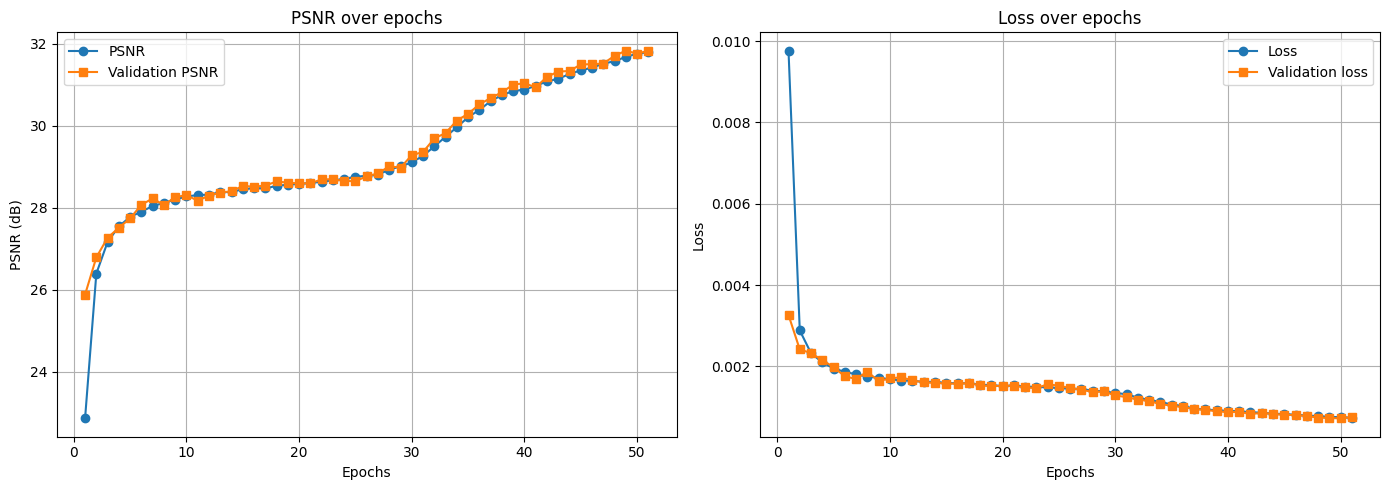

In [30]:
reload(utils)
fig = utils.get_psnr_and_loss_curves('models/saved/synthetic_denoiser_07122024/training.log', together=True)
fig.savefig('models/saved/synthetic_denoiser_07122024/img/psnr_loss.pdf')

## Evaluation

1/1 [==============================] - 0s 64ms/step
noisy_spec_input.shape = (1, 192, 192, 1)
denoised_spec_pred.shape = (1, 192, 192, 1)


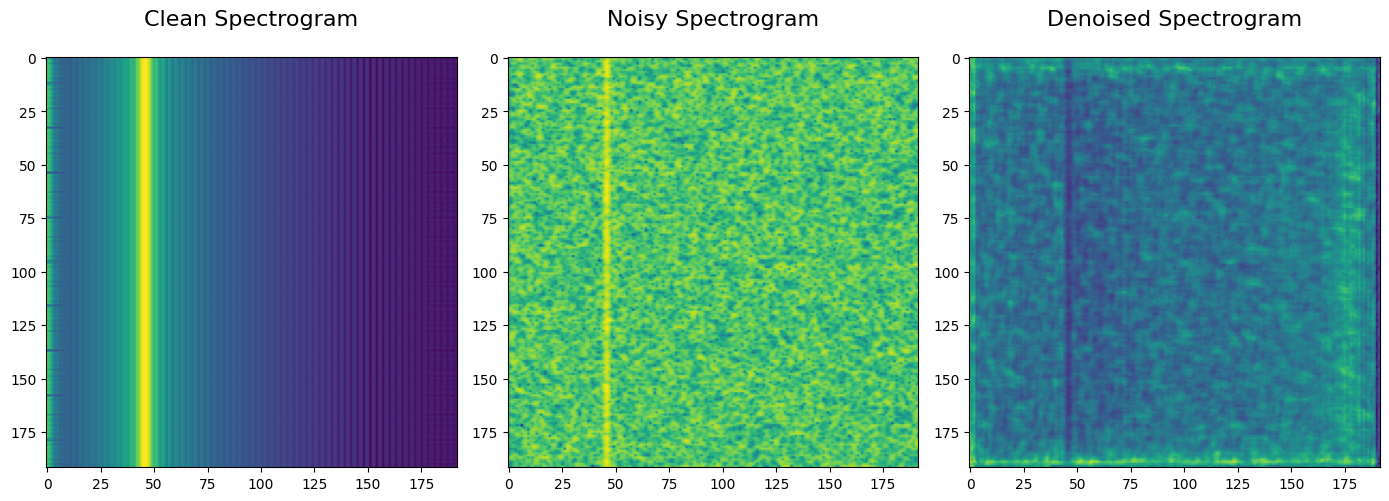

In [68]:
reload(synthetic_spectrograms)

# Function to plot spectrograms
def plot_comparison(clean_spec, noisy_spec, denoised_spec):
    fig = plt.figure(figsize=(14, 6))

    fontsize = 16

    # Clean spectrogram
    plt.subplot(1, 3, 1)
    plt.imshow(clean_spec.T)
    plt.title("Clean Spectrogram\n", fontdict={'size': fontsize})

    # Noisy spectrogram
    plt.subplot(1, 3, 2)
    plt.imshow(noisy_spec.T.squeeze())
    plt.title("Noisy Spectrogram\n", fontdict={'size': fontsize})

    # Denoised spectrogram
    plt.subplot(1, 3, 3)
    plt.imshow(denoised_spec.T.squeeze())
    plt.title("Denoised Spectrogram\n", fontdict={'size': fontsize})

    plt.tight_layout()
    return fig

# Generate test data
_, clean_signal, _ = synthetic_spectrograms.generate_sine_wave(duration, fs, amplitude=3, freq=600)
noisy_signal, _ = synthetic_spectrograms.add_gaussian_noise(clean_signal, std=7)

# Create spectrograms
f, t, clean_spec = synthetic_spectrograms.create_spectrogram(clean_signal, fs, window, noverlap, nfft, power=True)
_, _, noisy_spec = synthetic_spectrograms.create_spectrogram(noisy_signal, fs, window, noverlap, nfft, power=True)

# Prepare noisy spectrogram for the model
clean_spec = cv2.resize(clean_spec, (192, 192))
noisy_spec = cv2.resize(noisy_spec, (192, 192))

noisy_spec_input = np.expand_dims(cv2.resize(noisy_spec, (192, 192)), axis=-1)
noisy_spec_input = np.expand_dims(noisy_spec_input, axis=0) # Add batch dimension

# Predict using the model
denoised_spec_pred = model.predict(noisy_spec_input)

print(f"noisy_spec_input.shape = {noisy_spec_input.shape}")
print(f"denoised_spec_pred.shape = {denoised_spec_pred.shape}")

# Plot clean, noisy, and denoised spectrograms
fig = plot_comparison(clean_spec, noisy_spec, denoised_spec_pred)

fig.savefig("models/saved/synthetic_denoiser_07122024/img/comparison.pdf")